# EXPERIMENT 5
Applying Transfer Learning on DenseNet201 network to the CIFAR 10 dataset.

# Transfer learning
Transfer learning is a machine learning technique where a model trained on one task is re-purposed on a second related task.
In transfer learning, we first train a base network on a base dataset and task, and then we repurpose the learned features, or transfer them, to a second target network to be trained on a target dataset and task. This process will tend to work if the features are general, meaning suitable to both base and target tasks, instead of specific to the base task.


# Dataset
CIFAR-10 dataset The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

http://www.cs.utoronto.ca/~kriz/cifar.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
import keras

#Load the dataset:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


170500096/170498071 [==============================] - 7s 0us/step


# Checking the shape of the train and test dataset

In [2]:
print("There are {} train images and {} test images.".format(X_train.shape[0], X_test.shape[0]))
print('There are {} unique classes to predict.'.format(np.unique(y_train).shape[0]))

There are 50000 train images and 10000 test images.
There are 10 unique classes to predict.


#One-hot encoding the labels

In [0]:
num_classes = 10
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

# Visualizing & Displaying the first eight images in the training data

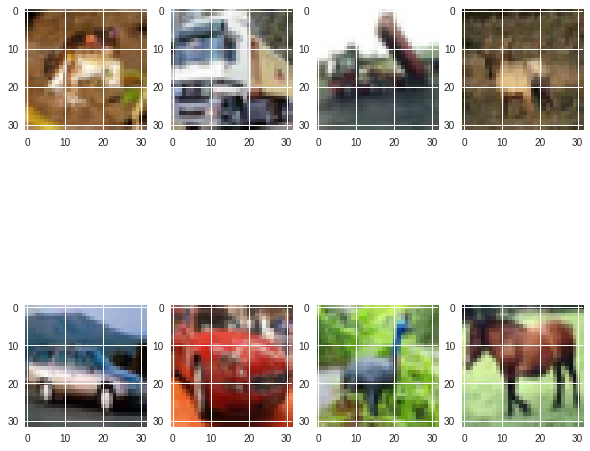

In [4]:
fig = plt.figure(figsize=(10, 10))

for i in range(1, 9):
    img = X_train[i-1]
    fig.add_subplot(2, 4, i)
    plt.imshow(img)


#Building up a Sequential model
Each image in the dataset is of size: 32x32 x3.Building a model from scratch. 

In [5]:
#Importing the necessary libraries 
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, GlobalAveragePooling2D

#Building up a Sequential model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',input_shape = X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(GlobalAveragePooling2D())
model.add(Dense(10, activation='softmax'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 64)          18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
glob

The model contains three convolutional layers, each followed by a max pooling layer and finally a Global Average Pooling layer followed by a dense layer with ‘softmax’ as the activation function. There are a total of 29,290 parameters to train.By using ‘binary cross-entropy’ as the loss function, ‘adam’ as the optimizer and ‘accuracy’ as the performance metric.

# Compiling the model

In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=['accuracy'])

# Rescaling the data. 
Rescale is a value by which we will multiply the data such that the resultant values lie in the range (0-1). So, in general, scaling ensures that just because some features are big in magnitude, it doesn’t mean they act as the main features in predicting the label.

In [0]:
X_train_scratch = X_train/255.
X_test_scratch = X_test/255.

# Creating a checkpointer to save the weights of the best model (i.e. the model with minimum loss).



Finally, fitting the model to the training data points and labels. After that, spliting the whole training data in batches of 32 and train the model for 10 epochs. We will use be 20 percent of our training data as our validation data. Hence, we will train the model on 10000 samples and validate of 10000 samples.

In [8]:
#Creating a checkpointer 
checkpointer =keras.callbacks.ModelCheckpoint(filepath='scratchmodel.best.hdf5', 
                               verbose=1,save_best_only=True)
# keras.callbacks.ModelCheckpoint(filepath ='scratchmodel.best.hdf5', monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)
#Fitting the model on the train data and labels.
model.fit(X_train, y_train, batch_size=32, epochs=10, 
          verbose=1, callbacks=[checkpointer], validation_split=0.2, shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 16s 389us/step - loss: 2.8859 - acc: 0.8200 - val_loss: 2.8845 - val_acc: 0.8201

Epoch 00001: val_loss improved from inf to 2.88448, saving model to scratchmodel.best.hdf5
Epoch 2/10
40000/40000 [==============================] - 10s 260us/step - loss: 2.8857 - acc: 0.8200 - val_loss: 2.8845 - val_acc: 0.8201

Epoch 00002: val_loss did not improve from 2.88448
Epoch 3/10
40000/40000 [==============================] - 10s 262us/step - loss: 2.8857 - acc: 0.8200 - val_loss: 2.8845 - val_acc: 0.8201

Epoch 00003: val_loss did not improve from 2.88448
Epoch 4/10
40000/40000 [==============================] - 10s 261us/step - loss: 2.8857 - acc: 0.8200 - val_loss: 2.8845 - val_acc: 0.8201

Epoch 00004: val_loss did not improve from 2.88448
Epoch 5/10
40000/40000 [==============================] - 10s 259us/step - loss: 2.8857 - acc: 0.8

# Evaluating the model on the test data & Printing the accuracy
The best model produces an accuracy of 82.01% on the training samples and 81.96% on the validation samples. Let’s evaluate the performance of the model on the test dataset.

In [9]:
#Evaluate the model on the test data
score = model.evaluate(X_test, y_test)

#Accuracy on test data
print('Accuracy on the Test Images: ', score[1])

10000/10000 [==============================] - 1s 79us/step
Accuracy on the Test Images:  0.8200000176429748


So, the CNN model produces an accuracy of 82% on the test dataset. Let’s implement transfer learning  and check if we can improve the model by using the Densenet201 model, pre-trained on the ‘Imagenet weights’ to implement transfer learning. 

# Importing the Densenet201 model

In [10]:
# from keras_applications import densenet
# from keras.applications.imagenet_utils import preprocess_input as _preprocess_input
# from keras.applications import DenseNet201
# from skimage import data, io, filters, transform


#Importing the Densenet201 model
from keras.applications.densenet import DenseNet201, preprocess_input


#Loading the Densenet201 model with pre-trained ImageNet weights
model = DenseNet201(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

74842112/74836368 [==============================] - 1s 0us/step


In [0]:
def DenseNetImageNet201(input_shape=None,
                        bottleneck=True,
                        reduction=0.5,
                        dropout_rate=0.0,
                        weight_decay=1e-4,
                        include_top=True,
                        weights=None,
                        input_tensor=None,
                        pooling=None,
                        classes=1000,
                        activation='softmax'):
    return DenseNet(input_shape, depth=201, nb_dense_block=4, growth_rate=32,
                    nb_filter=64, nb_layers_per_block=[6, 12, 48, 32],
                    bottleneck=bottleneck, reduction=reduction,
                    dropout_rate=dropout_rate, weight_decay=weight_decay,
                    subsample_initial_block=True, include_top=include_top,
                    weights=weights, input_tensor=input_tensor,
                    pooling=pooling, classes=classes, activation=activation)

Using the pre-trained DenseNet201 model to create bottleneck features for the training data. Next, we will store these bottleneck features offline because calculating them could be computationally expensive

In [0]:
# from keras.applications.imagenet_utils import preprocess_input as _preprocess_input
import numpy as np
import skimage 
from scipy.misc import imresize

#Preprocessing the data, so that it can be fed to the pre-trained ResNet50 model. 
densenet_train_input = preprocess_input(X_train)

#Creating bottleneck features for the training data
train_features = model.predict(densenet_train_input)

#Saving the bottleneck features
np.savez('densenet_train_input', features=train_features)

In [0]:
#Preprocessing the data, so that it can be fed to the pre-trained ResNet50 model.
densenet_test_input = preprocess_input(X_test)

#Creating bottleneck features for the testing data
test_features = model.predict(densenet_test_input)

#Saving the bottleneck features
np.savez('densenet_features_test', features=test_features)
#print(X_train.shape[1:])

In [14]:
print(X_train.shape[1:])

(32, 32, 3)


# Compliing the Model with DenseNet201

In [15]:
model = Sequential()
# model.add(GlobalAveragePooling2D(input_shape=train_features.shape[1:]))
model.add(Conv2D(32, (3, 3), activation='relu',input_shape = (X_train.shape[1:])))
#model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(256))

model.add(Dense(10, activation='softmax'))
model.summary()


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               3211520   
___________________________

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

# Fitting the model on DenseNet201 network

In [17]:
#Creating a checkpointer 
checkpointer =keras.callbacks.ModelCheckpoint(filepath='scratchmodel.best.hdf5', 
                               verbose=1,save_best_only=True)
#Fitting the model on the train data and labels.
model.fit(X_train, y_train, batch_size=32, epochs=10, 
          verbose=1, callbacks=[checkpointer], validation_split=0.2, shuffle=True)
# #Creating a checkpointer 
# checkpointer =keras.callbacks.ModelCheckpoint(filepath='scratchmodel.best.hdf5', 
#                                verbose=1,save_best_only=True)
# # keras.callbacks.ModelCheckpoint(filepath ='scratchmodel.best.hdf5', monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)
# #Fitting the model on the train data and labels.
# model.fit(X_train, y_train, batch_size=32, epochs=10, 
#           verbose=1, callbacks=[checkpointer], validation_split=0.2, shuffle=True)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 23s 571us/step - loss: 14.4984 - acc: 0.1004 - val_loss: 14.5385 - val_acc: 0.0980

Epoch 00001: val_loss improved from inf to 14.53852, saving model to scratchmodel.best.hdf5
Epoch 2/10
40000/40000 [==============================] - 18s 449us/step - loss: 14.4982 - acc: 0.1005 - val_loss: 14.5385 - val_acc: 0.0980

Epoch 00002: val_loss did not improve from 14.53852
Epoch 3/10
40000/40000 [==============================] - 18s 447us/step - loss: 14.4982 - acc: 0.1005 - val_loss: 14.5385 - val_acc: 0.0980

Epoch 00003: val_loss did not improve from 14.53852
Epoch 4/10
40000/40000 [==============================] - 18s 452us/step - loss: 14.4982 - acc: 0.1005 - val_loss: 14.5385 - val_acc: 0.0980

Epoch 00004: val_loss did not improve from 14.53852
Epoch 5/10
40000/40000 [==============================] - 18s 452us/step - loss: 14.4986 - acc: 0.1005 - val_loss: 14.5385 - val_acc: 

# Evaluating the model on the test data & Printing the accuracy using the DenseNet201

In [18]:
# #Evaluate the model on the test data
# score  = model.evaluate(test_features, y_test)

# #Accuracy on test data
# print('Accuracy on the Test Images: ', score[1])

scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 1s 147us/step
Test loss: 14.506285668945312
Test accuracy: 0.1


# Conclusion
Based on the above model, by using pre-trained features, the accuracy of the model  was intiially 82% on the test data but after applying the DenseNet201 network is was very less. Also, the number of trainable parameters in the transfer model is low as compared to scratch model. Hence the model needs to be further trained more to predict better results.

# References
https://www.hackerearth.com/practice/machine-learning/transfer-learning/transfer-learning-intro/tutorial/

https://www.learnopencv.com/keras-tutorial-transfer-learning-using-pre-trained-models/ & 

https://machinelearningmastery.com/transfer-learning-for-deep-learning/